## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px

import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Tuwaiq/Task (2) Dataset.csv')
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


# Data Exploration

In [4]:
df.columns

Index(['City', 'Datetime', 'TrafficIndexLive', 'JamsCount', 'JamsDelay',
       'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric',
       'TravelTimeLive'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


In [22]:
df.duplicated().sum()

0

In [23]:
df.isnull().sum()

,0
City,0
Datetime,0
TrafficIndexLive,0
JamsCount,0
JamsDelay,0
JamsLength,0
TrafficIndexWeekAgo,0
TravelTimeHistoric,3867
TravelTimeLive,3867
Time,0


# Data preprocessing

In [11]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [ ]:
df['hour'] = df['Time'].dt.hour

### null values

In [24]:
# There are null values ​​in the TravelTimeHistoric and TravelTimeLive columns, and I don't need these columns in my analysis, so I'll drop them.

df.drop(columns=['TravelTimeHistoric', 'TravelTimeLive'], axis=1, inplace=True)

### Identify and analyze patterns in the data.

# Data Visualization

The correlation heatmap reveals strong positive relationships between the number of traffic jams (JamsCount), the total length of jams (JamsLength), and the resulting delay (JamsDelay). This suggests that as the number of traffic jams increases, the overall length and total delay experienced by drivers also rise proportionally.

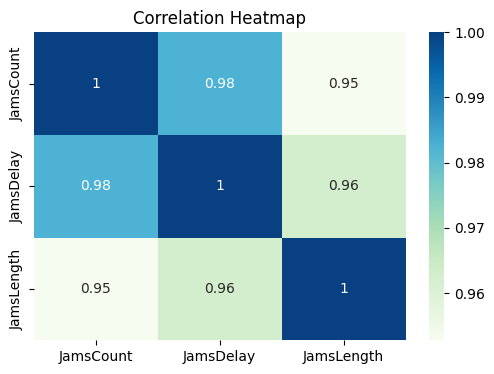

In [14]:
correlations_columns= df[['JamsCount' , 'JamsDelay' , 'JamsLength']]

corr_tabel = correlations_columns.corr()
corr_tabel

plt.figure(figsize=(6, 4))
sns.heatmap(corr_tabel, annot=True , cmap="GnBu")
plt.title('Correlation Heatmap')
plt.show()




---



We want to know which city has the highest traffic jams, the figure below shows the average traffic jam for each city and shows that Dubai is the most traffic congested city.

In [9]:
grouped = df.groupby('City')['JamsCount'].mean()
grouped = pd.DataFrame(grouped)

grouped = grouped.sort_values(by = 'JamsCount', ascending = False)


fig = px.bar(grouped, x=grouped.index, y='JamsCount', title='Avg traffic jams in each city', color_discrete_sequence=['#80E1B2'])

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=grouped.index,
        ticktext=grouped.index
    )
)
fig.show()



---



We wanted to know what are the hours when traffic congestion is highest in Riyadh. The figures showed that the time when traffic congestion is highest is approximately between 15:00 and 19:00.

In [21]:
# The busiest hours in Riyadh
filtered = df[df['City'] == 'Riyadh']
grouped2 = filtered.groupby('hour')['JamsCount'].mean()
grouped2 = pd.DataFrame(grouped2)


fig = px.line(grouped2, grouped2.index, y="JamsCount", title='Busiest hours in Riyadh', color_discrete_sequence=['#57CB87'])
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=grouped2.index,
        ticktext=grouped2.index
    )
)
fig.show()




---



the figure bellow shows that the difference between the current and previous week's traffic index is not drastic for most cities, suggesting a relatively stable traffic pattern over the week

In [35]:
traffic_live = df.groupby('City')['TrafficIndexLive'].mean()

traffic_week_ago = df.groupby('City')['TrafficIndexWeekAgo'].mean()

traffic_data = pd.DataFrame({
    'TrafficIndexLive': traffic_live,
    'TrafficIndexWeekAgo': traffic_week_ago
})

traffic_data = traffic_data.sort_values(by='TrafficIndexLive', ascending=False)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=traffic_data.index,
    y=traffic_data['TrafficIndexLive'],
    name='TrafficIndexLive',
    marker_color='#80E1B2'
))

fig.add_trace(go.Bar(
    x=traffic_data.index,
    y=traffic_data['TrafficIndexWeekAgo'],
    name='TrafficIndexWeekAgo',
    marker_color='#57CB87'
))

fig.update_layout(
    title='Mean Traffic Index by City',
    xaxis_title='City',
    yaxis_title='Traffic Index',
    barmode='group'
)

fig.show()